# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

In [2]:
# Read the dataset
visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# Copying data to another variable to avoid any changes to original data
data = visa.copy()

<IPython.core.display.Javascript object>

In [4]:
# The first 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
# The last 5 rows of the dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
# Understand the shape of the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

In [7]:
# Check the data types of the columns for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [8]:
# Cheking for null values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* Firstly, we check if the names of the columns have spaces, dots, and dash to maintain uniformity among the column names.
* Dependent variable is the case_status which is of categorical type.
* no_of_employees, yr_of_estab, prevailing_wage are integer and float types while other variables are categorical type.
* There are no missing values in the dataset.
* Low memory in dataset, no need to covert the Object to Categorical.

In [9]:
# Checking for duplicate values
print(f"There are {data.duplicated().sum()} duplicated values.")

There are 0 duplicated values.


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# Statistical summary of the numerical data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* Firstly and before continue to a statistical summary, we see that minimum value at "no_of_employees" feature is a negative value. Of course that is wrong and need to be fixed.

In [11]:
# Finding the number of negative employees values
negatives = data.loc[data["no_of_employees"] < 0, "no_of_employees"].count()
print(f"There are {negatives} negative values. ")

There are 33 negative values. 


<IPython.core.display.Javascript object>

In [12]:
# Convert negative to positive
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [13]:
# Prove the number of negative employees values after converting
negatives_2 = data.loc[data["no_of_employees"] < 0, "no_of_employees"].count()
print(f"There are {negatives_2} negative values. ")

There are 0 negative values. 


<IPython.core.display.Javascript object>

In [14]:
# New statistical summary of the numerical data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* The std and mean values from all values are not same.So we don't expect outliers.
* The yr_of_estab is date value.
* The minimum value of prevailing_wage is very low and a little bit strange or related with working per hour. We cannot decide how to treat it.

In [15]:
# New statistical summary of categorical features.
data.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

* Normal 6 unique values for the continets as in Antartica is not populated from human beings.
* 4 different types of education with the most common on the applicants to have a Bachelor degree.
* 4 different types of unit_of_wage with the most common between the applicants is the Year contract.
* In the dataset the majority of the employees applied for a full_time job.
* More and better observations follow on EDA.

In [16]:
# Printing the number of unique cases 
print(f"From the {data.case_id.count()} cases, the {data.case_id.nunique()} are unique")


From the 25480 cases, the 25480 are unique


<IPython.core.display.Javascript object>

* All cases are unique.

In [17]:
# Droppping the column with all unique values
data = data.drop("case_id", axis=1)

<IPython.core.display.Javascript object>

In [18]:
# Define as cols_cat all the object type columns
cols_cat = data.select_dtypes(["object"])

<IPython.core.display.Javascript object>

In [19]:
# Find the unqiue values of all the object types columns

for i in cols_cat.columns:
    print(f"Unique values in \033[1m{i}\033[0m are :")
    print(cols_cat[i].value_counts())
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

* All values look fine and we don't have to change something.


## <a name='questions'>Leading Questions<a>:
    
<i><b>click the link to go directly to the following solution.</b></i>
    
<a href = #link1>1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?</a>
    
<a href = #link2>2. How does the visa status vary across different continents?</a>
    
<a href = #link3>3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? </a>
    
<a href = #link4>4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?  </a>
    
<a href = #link5>5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?</a>

### Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### DO THE FOLLOWING OBSERVATIONS

* Observations on number of employees // histogram_boxplot(data, "no_of_employees")\\
* Observations on prevailing wage



**Number of Employees**

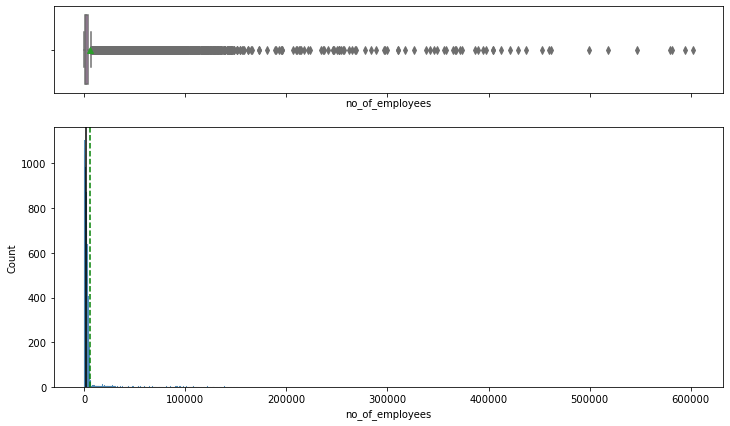

<IPython.core.display.Javascript object>

In [21]:
# Histogram_boxplot for employees number
histogram_boxplot(data, "no_of_employees")

* we can expect such a diagram because of the many non unique number of employees at every company. Maybe a boxplot by excluding the low value will be more efficient.

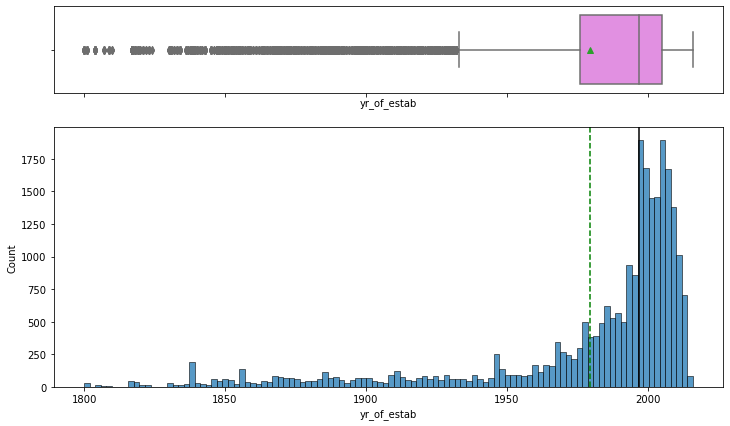

<IPython.core.display.Javascript object>

In [22]:
# Histogram_boxplot for years of establishment
histogram_boxplot(data, "yr_of_estab")


* Date numeric column.
* It is left-skewed.
* It has a lot of outliers on the left side.

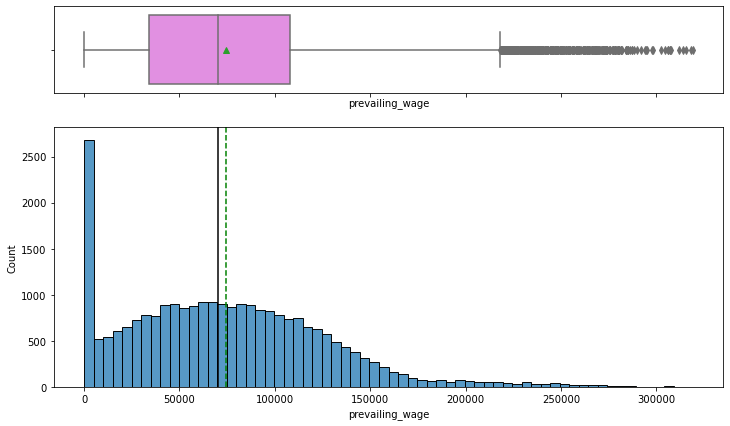

<IPython.core.display.Javascript object>

In [23]:
# Histogram_boxplot for prevailing wage
histogram_boxplot(data, "prevailing_wage")

In [24]:
# Find the
data.loc[data["prevailing_wage"] < 6000, "unit_of_wage"].count()

2774

<IPython.core.display.Javascript object>

* Right_skewed with outliers on the right side.
* Mean and Median almost the same.
* We cab observe from the plot and then we calculate that 2774 people under 6000 prevailing wage !

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**Continent**

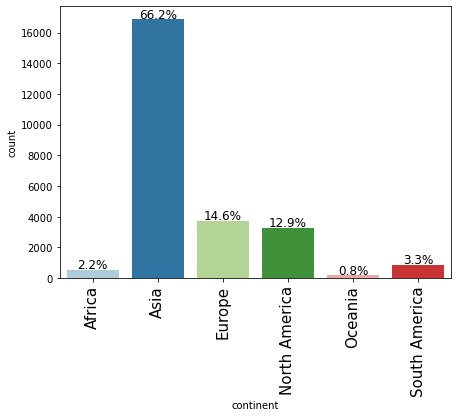

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "continent", perc=True)

**Observations**

* 2/3 of the applications come from Asia.
* Following Euripe, North America, South america and Africa.
* As expected Oceania in the last position.

**Education of Employees**

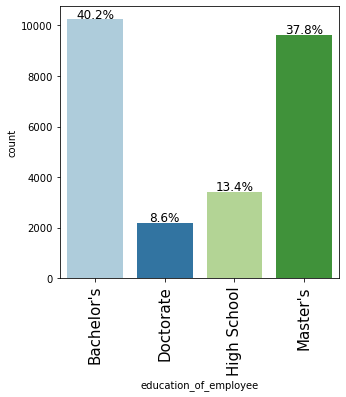

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observations**

* As we mentioned before the majority of the applicants having a Bachelor degree.
* Follows and in a small distance the applicants with Master degree.
* Not a big percentage from people with only High school level or Phd degree.

**Job Experience**

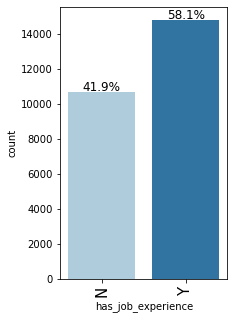

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "has_job_experience", perc=True)

**Observations**

* Almost 3/5 of the applicants having Job experience

**Job Training**

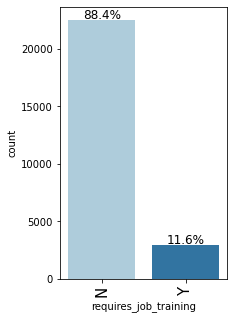

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "requires_job_training", perc=True)

**Observations**

* Huge difference between No and Yes. The percentage of not requirable training job has 88,4% !

**Region of Employment**

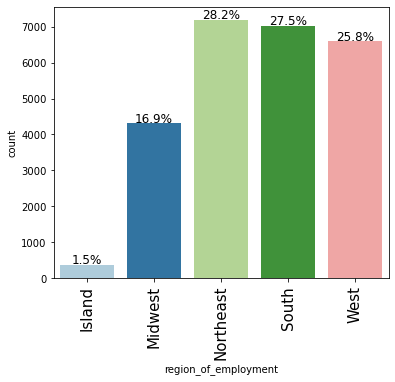

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "region_of_employment", perc=True)

**Observations**

* As expected, the region of employment with the highest value is coming from the most populated area of USA.
* Suprisingly comes as second and with a very small difference the South regions.
* Then West coast and follows the Midwest and in last position the Islands.

**Unit of Wage**

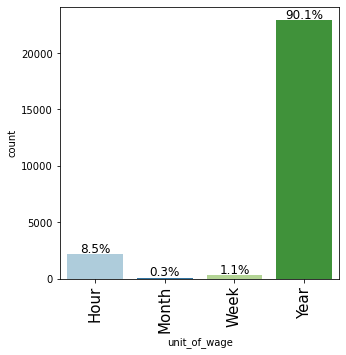

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "unit_of_wage", perc=True)

**Observations**

* It was quit obvious that the highest value would be the year contracted units. It takes a 90% of all the set.
* As second Hour, and then week and Month with a ver y low percentage.

**Case Status**

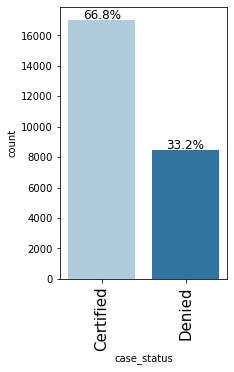

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "case_status", perc=True)

**Observations**

* Our dependent value. On this dataset 2/3 of people are certified.
* 1/3 are denied.

### Bivariate Analysis

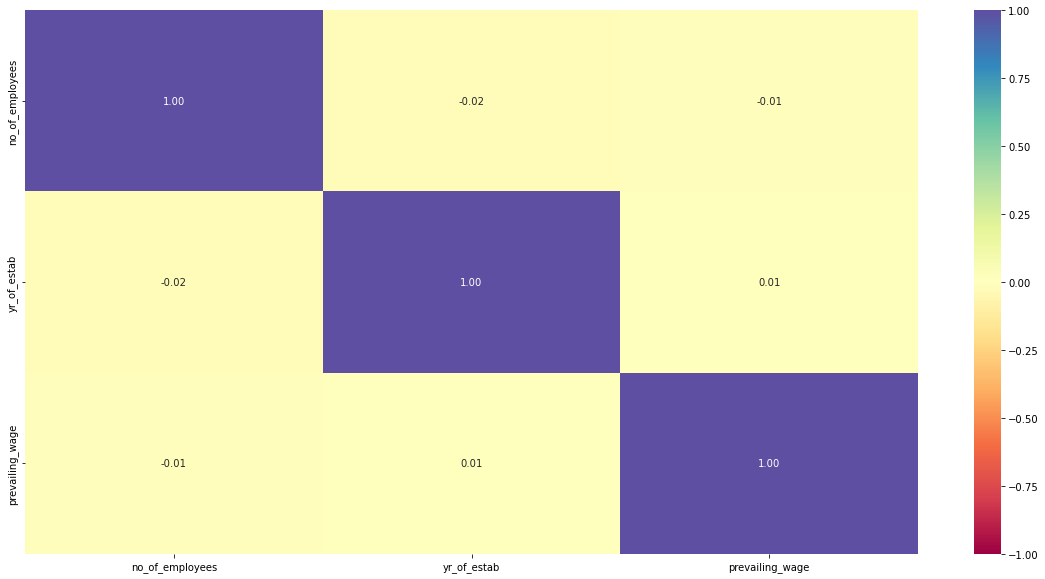

<IPython.core.display.Javascript object>

In [33]:
# Heatmap for correlation between the variables

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**


* Cannot find any significant correlation between the columns as it was expected from the meaning of our numerical columns.

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

<a name='link1'>Question 1:</a>

**Education of Employyes Vs Case Status**

or return to <a href = #questions>Leading Questions</a>

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


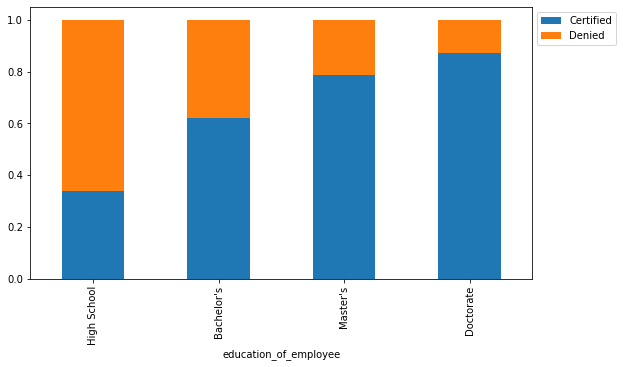

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "education_of_employee", "case_status")

**Observations**

* As far as a better education level, more unlike to be denied.
* 1/3 accepted in High School Level.
* 1/10 rejected on Doctorate Level.

**Region of Employment Vs Case Status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


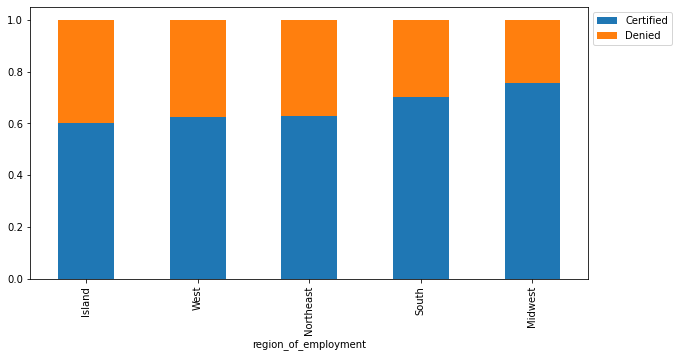

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "region_of_employment", "case_status")

**Observations**

* More possible to be certified in Midwest and south. Those are also the regions with lowest preferance from the native people. The need for more man power at those regions maybe make it easier for acceptance. 
* As soon as the level of Island-West-Northeast are almost the same percentages, maybe we have to see a better strategy for our dummies definition.

<a name='link2'>Question 2:</a>

**Continent Vs Case Status**

or return to <a href = #questions>Leading Questions</a>

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


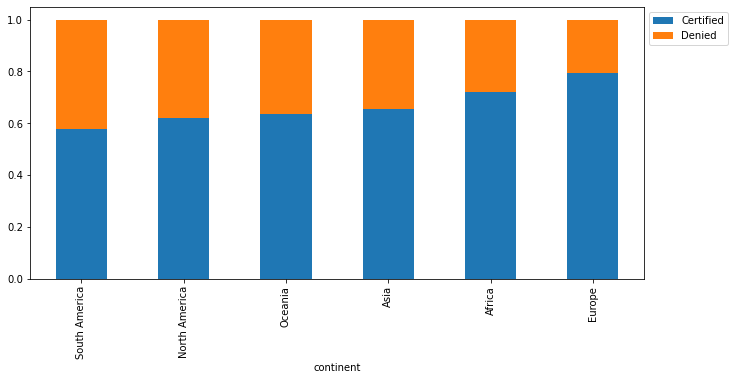

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "continent", "case_status")

**Observations**

* More likely to be accepted if an applicant come from Europe.
* No value is rejected unter 60% except South America.
* Almost the same percentages between North America-Oceania-Asia. 

<a name='link3'>Question 3:</a>

**Job experience Vs Case Status** 

or return to <a href = #questions>Leading Questions</a>



case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


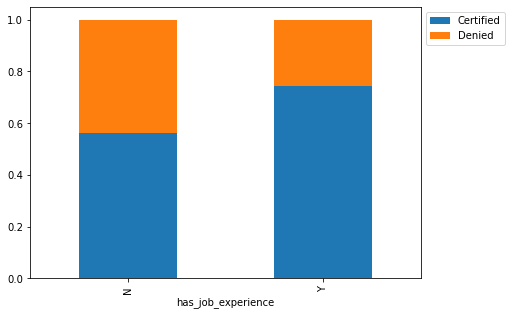

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "has_job_experience", "case_status")

**Observations**

* Obviously The most experienced have better possibilities for acceptance.

**Job Experience Vs Job Training**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


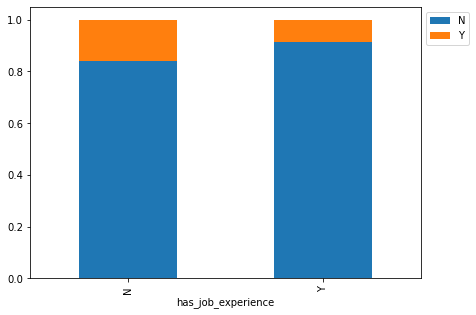

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

**Observations**

* Almost the same percentage. Not expected from my point of view. Experienced and not experienced have similar numbers of non requires_job_training.

<a name='link5'>Question 5:</a>

**Prevailin Wage Vs Case Status**

or return to <a href = #questions>Leading Questions</a>

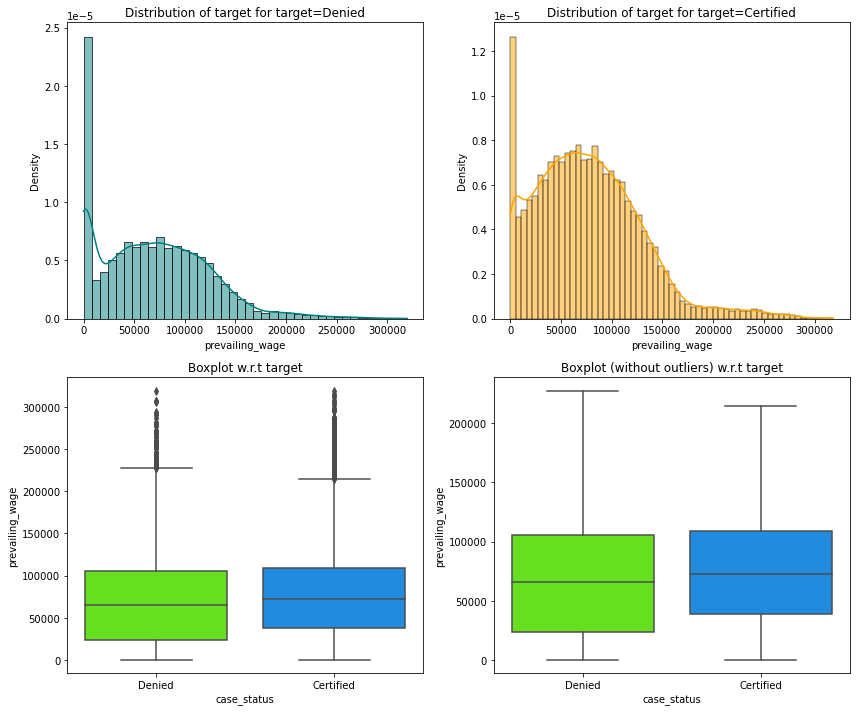

<IPython.core.display.Javascript object>

In [41]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

**Observations**

* Right-skewed with outliers only from one side.
* Analyze it without outliers.
* On boxplot we can see quit similar values on both mean and Q3 value.

**Prevailing Wage Vs Region of Employment**

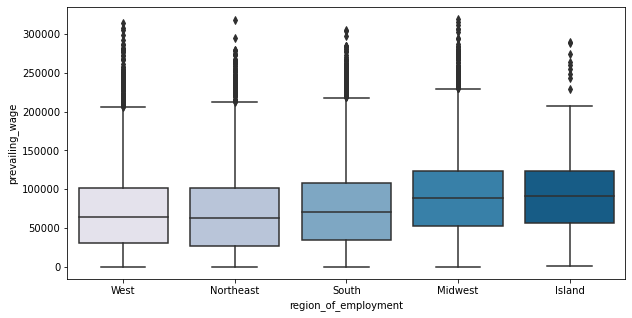

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["region_of_employment"], data["prevailing_wage"], palette="PuBu")
plt.show()

**Observations**

* Wages in areas where demand is high are also higher than in other areas.
* Outliers from one side as expected.
* Similarities at all the value between West, Northeast and South, and all of Midwest and Island.

<a name='link4'>Question 4:</a>

**Unit of Wage Vs Case Status**

or return to <a href = #questions>Leading Questions</a>

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


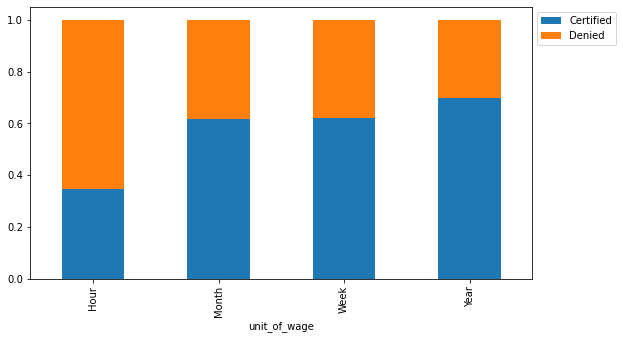

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "unit_of_wage", "case_status")

**Observations**

* Same percentage of acceptance and rejection between Month and Week.
* Biggest percentage of rejection for them who are hourly paid.
* Lowest for the yearly.

## Data Preprocessing
    

    
A.  Missing value treatment (if needed)
    
B.  Feature engineering
    
C.  Outlier detection and treatment (if needed)
    
D.  Preparing data for modeling 
    
E.  Any other preprocessing steps (if needed)

**Outliers Detection**

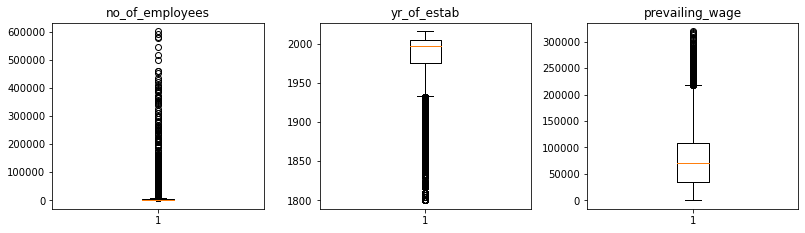

<IPython.core.display.Javascript object>

In [44]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observation**

* No need to change something 

**Data Preparation for Modeling**

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [45]:
# Drop 'case_status' from the data
X = data.drop(["case_status"], axis=1)

# Create dummies for X
X = pd.get_dummies(X, drop_first=True)
y = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


# Split data in train and test sets (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)


<IPython.core.display.Javascript object>

In [46]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("****************************************")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("****************************************")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
****************************************
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
****************************************
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

* Model predicts that the visa application will get certified but in reality, the visa application should get denied.
* Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [49]:
# Fitting decision tree on train data
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [50]:
# Checking train data performance
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

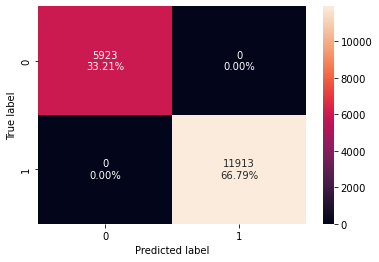

<IPython.core.display.Javascript object>

In [51]:
# Creating train data matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [52]:
# Checking test data performance
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

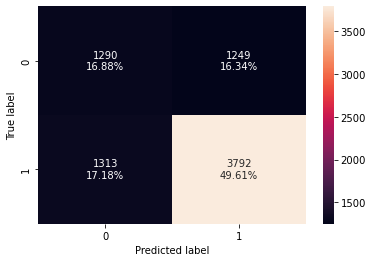

<IPython.core.display.Javascript object>

In [53]:
# Creating test data matrix
confusion_matrix_sklearn(model, X_test, y_test)

**Decision Tree- Tuning Hyperparameter**

In [54]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)


# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

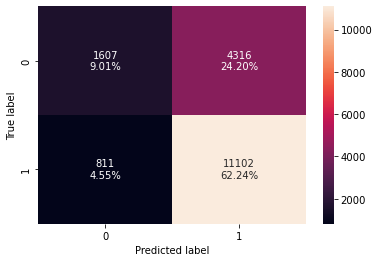

<IPython.core.display.Javascript object>

In [55]:
# Creating train data matrix
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [56]:
# Checking train data performance
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


<IPython.core.display.Javascript object>

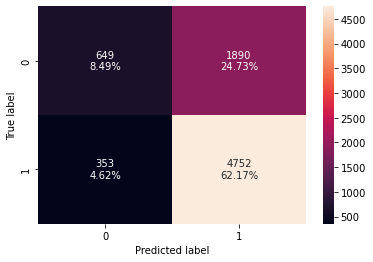

<IPython.core.display.Javascript object>

In [57]:
# Creating test data matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [58]:
# Checking test data performance
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


<IPython.core.display.Javascript object>

## Building bagging and boosting models

In [59]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

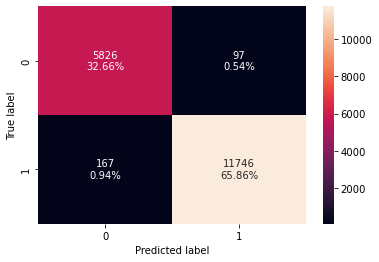

<IPython.core.display.Javascript object>

In [60]:
# Creating train data matrix
confusion_matrix_sklearn(bagging, X_train, y_train)

In [61]:
# Checking train data performance
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


<IPython.core.display.Javascript object>

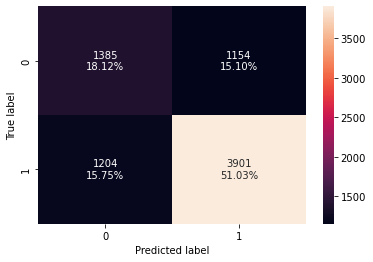

<IPython.core.display.Javascript object>

In [62]:
# Creating test data matrix
confusion_matrix_sklearn(bagging, X_test, y_test)

In [63]:
# Checking test data performance
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


<IPython.core.display.Javascript object>

**Bagging Classifier - Tuning Hyperparameter**

In [64]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

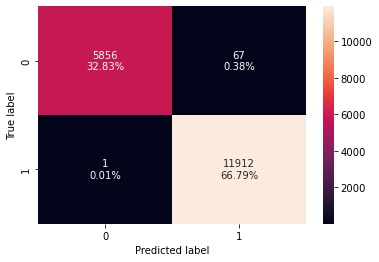

<IPython.core.display.Javascript object>

In [65]:
# Creating train data matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [66]:
# Checking train data performance
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


<IPython.core.display.Javascript object>

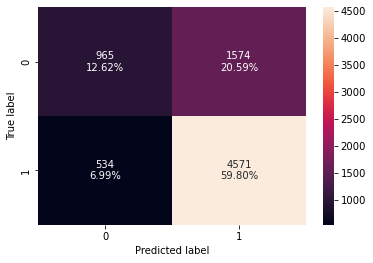

<IPython.core.display.Javascript object>

In [67]:
# Creating test data matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [68]:
# Checking test data performance
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


<IPython.core.display.Javascript object>

**Random Forest**

In [69]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

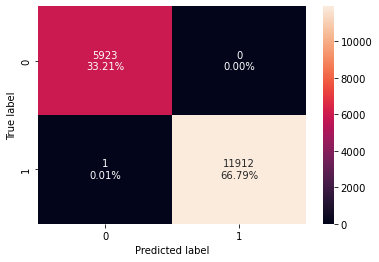

<IPython.core.display.Javascript object>

In [70]:
# Creating train data matrix
confusion_matrix_sklearn(rf, X_train, y_train)

In [71]:
# Checking train data performance
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


<IPython.core.display.Javascript object>

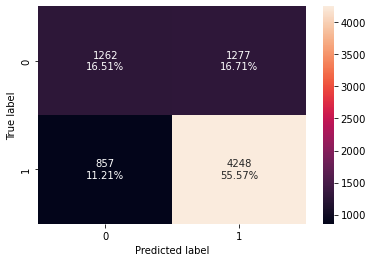

<IPython.core.display.Javascript object>

In [72]:
# Creating test data matrix
confusion_matrix_sklearn(rf, X_test, y_test)

In [73]:
# Checking test data performance
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


<IPython.core.display.Javascript object>

**Bagging Classifier - Tuning Hyperparameter**

In [74]:
# rf_estimator  # Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer)

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

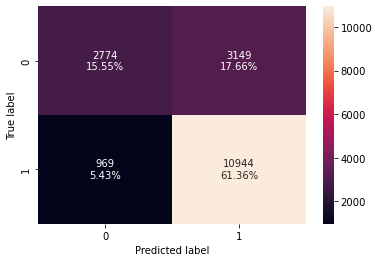

<IPython.core.display.Javascript object>

In [75]:
# Creating train data matrix
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [76]:
# Checking train data performance
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


<IPython.core.display.Javascript object>

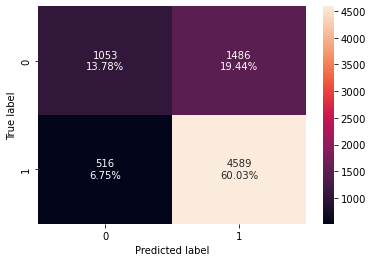

<IPython.core.display.Javascript object>

In [77]:
# Creating test data matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [78]:
# Checking test data performance
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


<IPython.core.display.Javascript object>

## Boosting Models

### AdaBoost Regressor

In [79]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

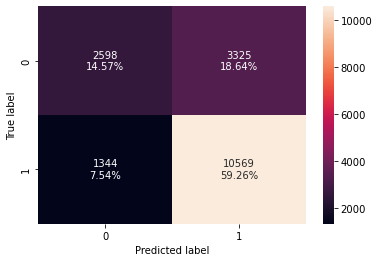

<IPython.core.display.Javascript object>

In [80]:
# Creating train data matrix
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [81]:
# Checking train data performance
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


<IPython.core.display.Javascript object>

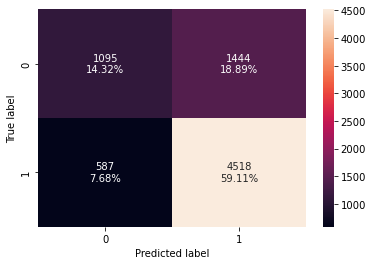

<IPython.core.display.Javascript object>

In [82]:
# Creating test data matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [83]:
# Checking test data performance
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance \n", ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - AdaBoost Regressor

In [84]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

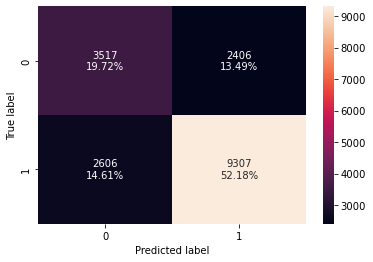

<IPython.core.display.Javascript object>

In [85]:
# Creating train data matrix
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [86]:
# Checking train data performance
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

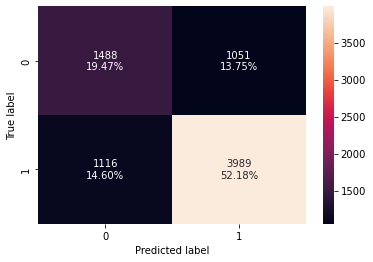

<IPython.core.display.Javascript object>

In [87]:
# Creating test data matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [88]:
# Checking test data performance
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

### Gradient Boosting Regressor

In [89]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

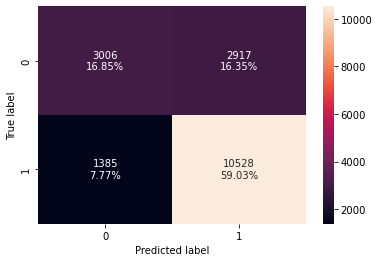

<IPython.core.display.Javascript object>

In [90]:
# Creating train data matrix
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [91]:
# Checking train data performance
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance \n", gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


<IPython.core.display.Javascript object>

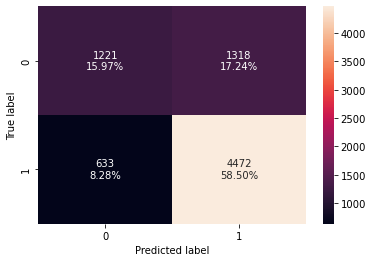

<IPython.core.display.Javascript object>

In [92]:
# Creating test data matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [93]:
# Checking test data performance
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance \n", gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Regressor

In [94]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

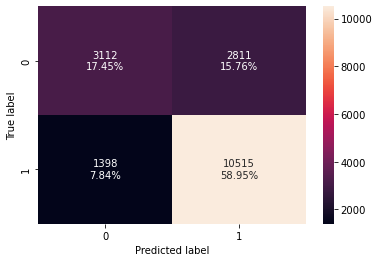

<IPython.core.display.Javascript object>

In [95]:
# Creating train data matrix
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [96]:
# Checking train data performance
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


<IPython.core.display.Javascript object>

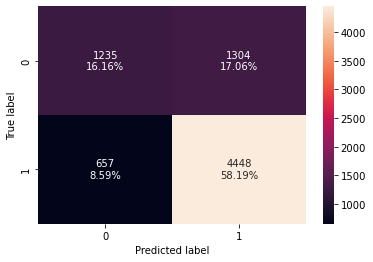

<IPython.core.display.Javascript object>

In [97]:
# Creating test data matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [98]:
# Checking test data performance
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


<IPython.core.display.Javascript object>

**Observation** 

* After hyperparameter tuning the model we didn't receive better results.

### XGBoost Regressor

In [99]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

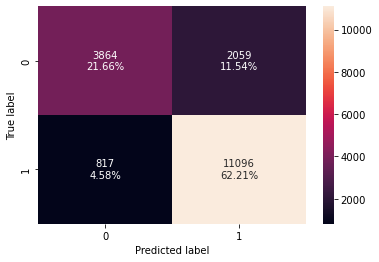

<IPython.core.display.Javascript object>

In [100]:
# Creating train data matrix
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [101]:
# Checking train data performance
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance \n", xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


<IPython.core.display.Javascript object>

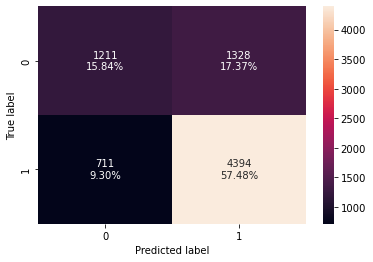

<IPython.core.display.Javascript object>

In [102]:
# Creating test data matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [103]:
# Checking test data performance
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance \n", xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - XGBoost Regressor

In [104]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

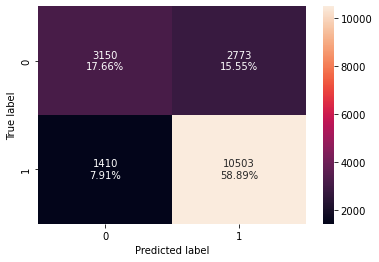

<IPython.core.display.Javascript object>

In [105]:
# Creating train data matrix
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [106]:
# Checking train data performance
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


<IPython.core.display.Javascript object>

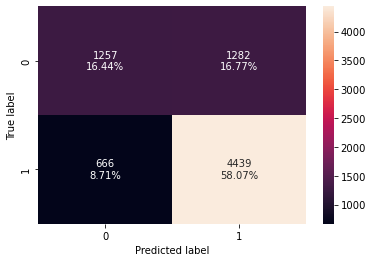

<IPython.core.display.Javascript object>

In [107]:
# Creating test data matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [108]:
# Checking test data performance
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


<IPython.core.display.Javascript object>

**Observation** 

* After hyperparameter tuning the model we didn't receive better results.

### Stacking Model

**Now, let's build a stacking model with the models - AdaBoost, Gradient Boosting, and Random Forest, then use XGBoost to get the final prediction.**

In [109]:
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                            

<IPython.core.display.Javascript object>

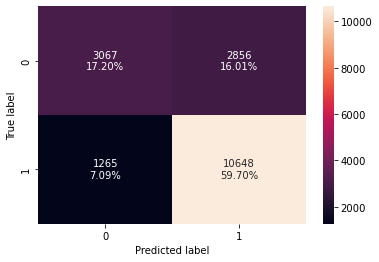

<IPython.core.display.Javascript object>

In [110]:
# Creating train data matrix
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [111]:
# Checking train data performance
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76895,0.893813,0.788507,0.837864


<IPython.core.display.Javascript object>

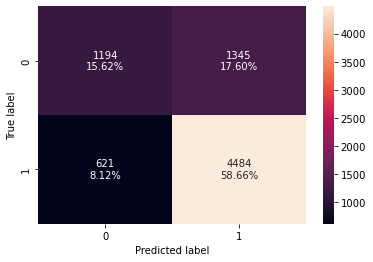

<IPython.core.display.Javascript object>

In [112]:
# Creating test data matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [113]:
# Checking test data performance
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742805,0.878355,0.769257,0.820194


<IPython.core.display.Javascript object>

##  Will tuning the hyperparameters improve the model performance?

* Mostly we concluded that the hyperparameter tuned model didn't react better.
* There is no significant optimasation and sometimes are worst. 
* The below comparison will show this particular induction. 

## Model Performance Comparison

### Comparing all models

In [114]:
# Compare all the train performances

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.769119,0.999944,0.738226,0.718995,0.758802,0.764017,0.838753,0.765474,0.768950
Recall,1.0,0.931923,0.985982,0.999916,0.918660,0.999916,0.887182,0.781247,0.883740,0.882649,0.931419,0.881642,0.893813
Precision,1.0,0.720067,0.991810,0.994407,0.776556,1.000000,0.760688,0.794587,0.783042,0.789059,0.843482,0.791127,0.788507
F1,1.0,0.812411,0.988887,0.997154,0.841652,0.999958,0.819080,0.787861,0.830349,0.833234,0.885272,0.833935,0.837864


<IPython.core.display.Javascript object>

In [115]:
# Compare all the test performances

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.738095,0.720827,0.734301,0.716510,0.744767,0.743459,0.733255,0.745160,0.742805
Recall,0.742801,0.930852,0.764153,0.895397,0.898923,0.832125,0.885015,0.781391,0.876004,0.871303,0.860725,0.869540,0.878355
Precision,0.752232,0.715447,0.771711,0.743857,0.755391,0.768869,0.757799,0.791468,0.772366,0.773296,0.767913,0.775913,0.769257
F1,0.747487,0.809058,0.767913,0.812622,0.820930,0.799247,0.816481,0.786397,0.820927,0.819379,0.811675,0.820063,0.820194


<IPython.core.display.Javascript object>

# Actionable Insights

* After comparing all the models, we decide that the best performing model is the <b>Gradient Boosting</b>. 

In [116]:
print(
    pd.DataFrame(
        gb_classifier.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.285978
has_job_experience_Y               0.155462
prevailing_wage                    0.136663
education_of_employee_Master's     0.087565
education_of_employee_Doctorate    0.083538
continent_Europe                   0.063035
unit_of_wage_Year                  0.036526
region_of_employment_Midwest       0.034432
region_of_employment_South         0.019024
no_of_employees                    0.014866
continent_North America            0.014537
yr_of_estab                        0.014220
region_of_employment_West          0.013583
continent_Asia                     0.011354
full_time_position_Y               0.009000
region_of_employment_Northeast     0.008039
continent_South America            0.007043
requires_job_training_Y            0.004692
continent_Oceania                  0.000311
unit_of_wage_Month                 0.000133
unit_of_wage_Week                  0.000000


<IPython.core.display.Javascript object>

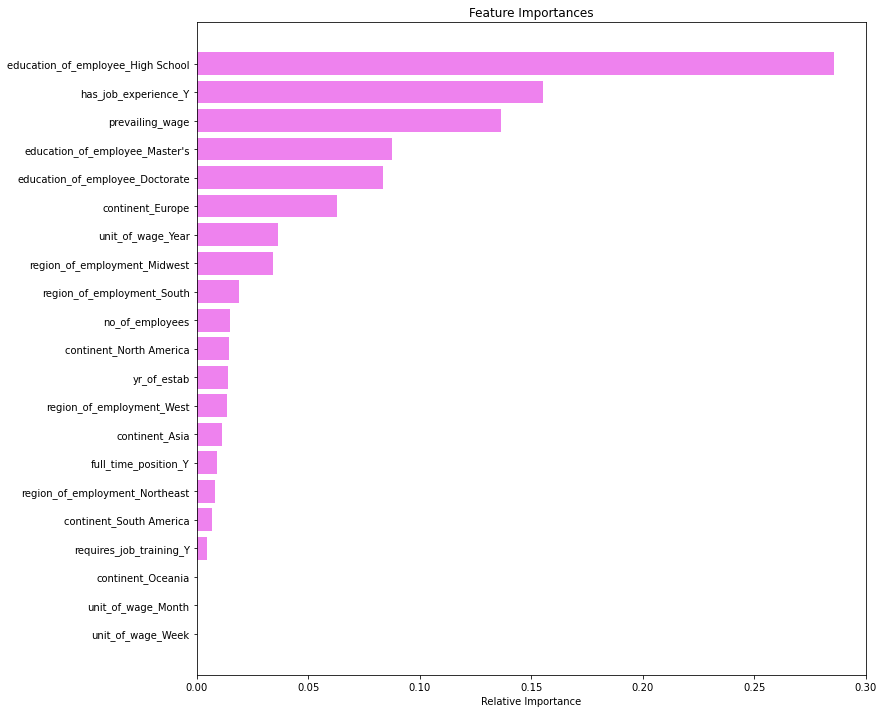

<IPython.core.display.Javascript object>

In [117]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Find Important Features**
* According to this model, the most important features are "education_of_employee_High_School", "has_job_experience_Y", "prevailing_wage".

***************************************************
# Business Recommendations
***************************************************



* We can use this predictive model for any reason to predict if an applicant has possiblities to be certified or to be denied.
* As we can see the most important feature from out final model are the education level of an applicant, the lowest education doesn't have enough possibilities to take a Visa. Applicants with High School level is more possible to be rejected.
* Additionally the work experience plays also a role and we see it above ("has_job_experience_Y").
* An applicant from Europe has more possibilities to be approved maybe because of agreements between US Goverment and the EU-Nations or european NATO nations.
* Usually the type of someone that would be accepted and certified is a European with a Bachelor or Master degree level, with a Work experience and a yearly contract.
* More possibilities from someone who applicates for VISA to be accepted and certified for regions with high demand on employees as Midwest and Islands.